## Богатов Антон Юрьевич
### Лабораторная работа
### Вариант 4
### Задания 2.5.1 и 2.10.2

### Задача 2.5.1
##### Условие:
Найти приближенно корень уравнения $f(x) = 0$, принадлежащий отрезку $[a, b]$, с точностью $ε = 10^{-5}$, используя модификацию* метода Ньютона для случая кратного корня при значениях $m = 1,2,3,4,5$. По числу итераций определить кратность корня.

$$f(x) = 36\cos x + 18\sqrt 3 x + 9x^2 + \pi ^2 - 18 -6\sqrt 3 \pi - 6\pi x$$ $$[a, b] = [0.8, 1.2]$$

##### Модифицированный метод Ньютона для поиска кратных корней: 
$$x_{n+1} = x_n - m\frac{f(x_n)}{f'(x_n)} , n = 0,1,.. , m = 1,2,..$$

In [1]:
import math
import numpy as np

# Функция:
def eq_sol(x):
    f = 36*math.cos(x)+18*math.sqrt(3)*x+9*x**2+math.pi**2-18-6*math.sqrt(3)*math.pi-6*math.pi*x
    return f

# Производная функции:
def eq1_sol(x):
    devf = 18*x - 36*math.sin(x) - 6*math.pi + 18*math.sqrt(3)
    return devf

eps = 10**(-5)
m = [1, 2, 3, 4, 5]

In [2]:
# Метод Ньютона:
def newton(x, m):
    x_next = x - m * (eq_sol(x)/eq1_sol(x))
    return x_next

for elem in m:
    x = 1.0
    j = 1
    x_next = newton(x, elem)
    for i in range(1000):
        if abs(x_next-x) < eps:
            print('Корень x =', x)
            break
        x = x_next
        x_next = newton(x, elem)
        j += 1    
    print('Для m =', elem, 'количество итераций:', j)

Корень x = 1.047176006904553
Для m = 1 количество итераций: 20
Корень x = 1.047190767426473
Для m = 2 количество итераций: 9
Корень x = 1.0471976022750344
Для m = 3 количество итераций: 3
Корень x = 1.0471930141557466
Для m = 4 количество итераций: 9
Корень x = 1.0472083129969545
Для m = 5 количество итераций: 36


По числу итераций видно, что корень имеет кратность 3.

In [3]:
print('Ответ: x =', x, ', кратности 3.')

Ответ: x = 1.0472083129969545 , кратности 3.


### Задача 2.10.2
##### Условие:
Функция $y = f(x)$ задана неявно уравнением $F(x,y) = 0$. На отрезке $[1, 5]$ построить таблицу значений функции $y = f(x)$ с шагом $h = 0.5$, применяя один из методов численного решения нелинейного уравнения (с точностью $ε = 10^{-7}$). Построить график функции $y=f(x)$ на заданном отрезке.
$$ F(x, y) = ch(ye^y + \frac{x}{20}) + \frac{1}{arctg(20ye^y + x)} - 13$$ $$ 1≤x≤5 $$ $$ 1≤y≤1.5 $$

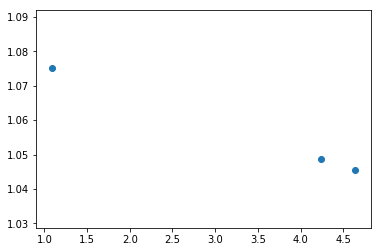

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(1, 5, 100000)
y = np.linspace(1, 1.5, 10000)
eps1 = 10**(-7)
x_good = []
y_good = []

# Функция:
def func(x, y):
    return np.cosh(y*np.exp(y) + x/20) + 1/(np.arctan(20*y*np.exp(y) + x)) - 13

# Находим точки, при которых значение близко к нулю, чтобы построить график:
for i in y:
    for j in x:
        if abs(func(j, i)) < eps1:
            x_good.append(j)
            y_good.append(i)
plt.scatter(x_good, y_good);

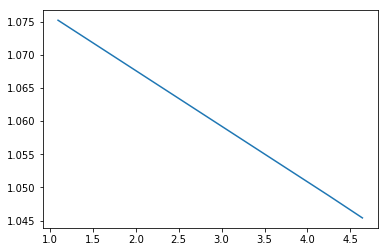

In [17]:
# График функции:
plt.plot(x_good, y_good);

In [18]:
# Убедимся, что можно использовать бисекцию:
xa, xb = 1, 5
y1_good = []
for j in y:
    if (np.sign(func(xa,j) * func(xb,j))) < 0:
        y1_good.append(j)
len(y1_good)

673

In [19]:
ya, yb = 1, 1.5
x1_good = []
for j in x:
    if np.sign(func(j,ya)) != np.sign(func(j,yb)):
        x1_good.append(j)
len(x1_good)

100000

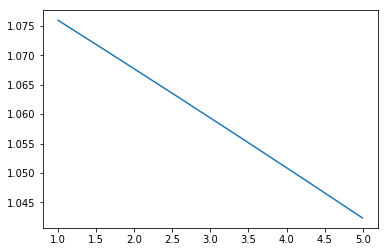

In [20]:
# Решаем бисекцией для у1_good:
eps2 = 10**(-7)
root = []
for y in y1_good:
    xa, xb = 1, 5
    d = np.abs(xa-xb) #5
    for i in range(1000):
        x0 = xa + d
        if (d < eps) or (np.abs(func(x0,y)) < eps):
            root.append(x0)
            break;
        if np.sign(func(x0,y)) == np.sign(func(xa,y)):
            xa = x0
        else:
            xb = x0
        d/=2
plt.plot(root, y1_good);

In [21]:
# Строим таблицу со значениями с шагом h = 0.5:
import pandas as pd
h = 0.5
root1 = []
y2_good = []
y2_good.append(y1_good[0])
root1.append(root[0])
for i in range(len(root)):
    if np.abs(root[i] - root1[-1]) >= h:
        root1.append(root[i])
        y2_good.append(y1_good[i])

d = {'x': root1, 'y': y2_good}
df = pd.DataFrame(data=d)
df

,x,y
0,4.994629,1.042354
1,4.489044,1.046705
2,3.986053,1.051005
3,3.485718,1.055256
4,2.982239,1.059506
5,2.481537,1.063706
6,1.977692,1.067907
7,1.476776,1.072057
